## Alpha Vantage API 


## FYI SECTION

The download limitation is manageable: a limit of 5 requests per minute and a limit of 500 requests per day.


This is a small demo into getting data from   [Alpha_Vantage](https://www.alphavantage.co/support/#api-key)

Some startup docs [Alpha|_Vantage](https://algotrading101.com/learn/alpha-vantage-guide/)

In [ ]:
pip install alpha_vantage

Note: you may need to restart the kernel to use updated packages.


In [ ]:
pip install alpha_vantage pandas

Note: you may need to restart the kernel to use updated packages.


In [ ]:
#imports for Alpha_Vantage 
from alpha_vantage.timeseries import TimeSeries
import matplotlib.pyplot as plt


To get data from the API, simply import the library and call the object with your API key. Next, get ready for some awesome, free, realtime finance data. Your API key may also be stored in the environment variable **ALPHAVANTAGE_API_KEY.**


In [ ]:

ts = TimeSeries(key='CALUZJL1K7UG9JR0')
# Get json object with the intraday data and another with  the call's metadata
data, meta_data = ts.get_intraday('GOOGL')

In [ ]:
print(ts.get_intraday)

<bound method TimeSeries.get_intraday of <alpha_vantage.timeseries.TimeSeries object at 0x7ffe8046e520>>


The library supports giving its results as json dictionaries (default), pandas dataframe (if installed) or csv, simply pass the parameter output_format='pandas' to change the format of the output for all the API calls in the given class. Please note that some API calls **do not support** the csv format (namely ForeignExchange, SectorPerformances and TechIndicators) because the API endpoint does not support the format on their calls either.

In [ ]:
# For the default date string index behavior
#ts = TimeSeries(key='YOUR_API_KEY',output_format='pandas', indexing_type='date')
# For the default integer index behavior
#ts = TimeSeries(key='YOUR_API_KEY',output_format='pandas', indexing_type='integer')

In [ ]:
from pprint import pprint
ts = TimeSeries(key='CALUZJL1K7UG9JR0', output_format='pandas')
#output size "full" downloads the price of a single stock for the last 20 years
data, meta_data = ts.get_intraday(symbol='AAPL',interval='1min', outputsize='full')
pprint(data.head(2))
#Saving the data to a pandas df format
data.to_csv('apple.csv')

                     1. open  2. high  3. low  4. close  5. volume
date                                                              
2021-01-28 20:00:00   136.52   136.63  136.51    136.63    17416.0
2021-01-28 19:59:00   136.53   136.55  136.51    136.53    12454.0


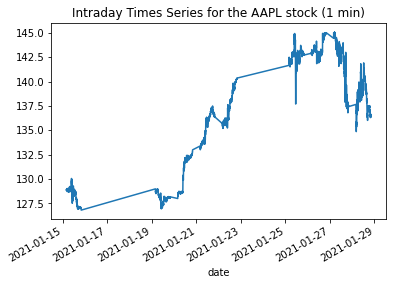

In [ ]:
data['4. close'].plot()
plt.title('Intraday Times Series for the AAPL stock (1 min)')
plt.show()

##### WE MIGHT LOOK LATER AT THESE INDICES


## Sector Performance

We can also plot sector performance just as easy:

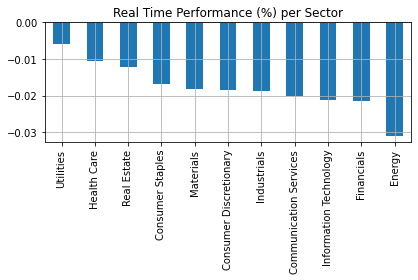

In [ ]:
from alpha_vantage.sectorperformance import SectorPerformances

sp = SectorPerformances(key='CALUZJL1K7UG9JR0', output_format='pandas')
data, meta_data = sp.get_sector()
data['Rank A: Real-Time Performance'].plot(kind='bar')

plt.title('Real Time Performance (%) per Sector')
plt.tight_layout()
plt.grid()
plt.show()

## CRYPTO CURRENCIES 

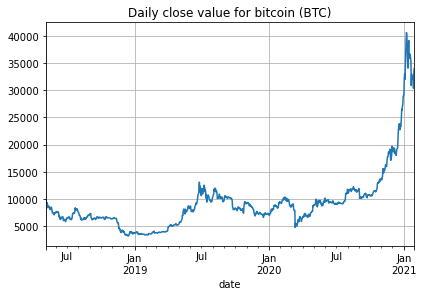

In [ ]:
from alpha_vantage.cryptocurrencies import CryptoCurrencies

cc = CryptoCurrencies(key='CALUZJL1K7UG9JR0', output_format='pandas')
data, meta_data = cc.get_digital_currency_daily(symbol='BTC', market='CNY')

#Saving the data to a pandas df format
#data.to_csv(Bitcoin.csv')

data['4b. close (USD)'].plot()
plt.tight_layout()
plt.title('Daily close value for bitcoin (BTC)')
plt.grid()
plt.show()

In [ ]:
#if you export ALPHAVANTAGE_API_KEY=123456789 in your venv you can use this format


api_key = os.getenv('ALPHAVANTAGE_API_KEY')

### USING PANDAS for download stock last 20 years

In [ ]:
#creating empty pandas df

import pandas as pd
import time


empty = pd.DataFrame()

#function to download stock historically 
def download_stock(tag):
  key = 'api_key'
  ts = TimeSeries(key)
  stock, meta = ts.get_daily(symbol=tag, outputsize='full')
  return stock, meta

In [ ]:
#converting array to DataFrame
def stock(tag, df_to_add):
  df_, _ = download_stock(tag)
  df_ = pd.DataFrame(df_)
  df_ = df_.transpose()
  df_ = df_.loc['2020–05–22':'2019–04–22']
  df_ = df_['1. open']
  df_ = pd.DataFrame(df_)
  df_.columns = [tag]
  df_ = df_[tag].values.astype(float)
  df_ = pd.concat([df_to_add, pd.DataFrame(df_)], axis=1)
  return df_

I will use this algorithm for the last when I need to reattach the date index to the collection of stock in one unique .csv file.

In [ ]:
def get_index(tag):
  df_, _ = download_stock(tag)
  df_ = pd.DataFrame(df_)
  df_ = df_.transpose()
  df_ = df_.loc['2020–05–22':'2019–04–22']
  df_ = df_['1. open']
  df_ = pd.DataFrame(df_)
  #extract index and return it as series
  df_ = df_.reset_index()
  return df_['index']

### List of stocks to download
To download multiple stocks at the same time, I will use their tags collected in one list:

In [ ]:
tag_list = ['AAPL', 'ABBV', 'GOOG', 'NFLX', 'MDLZ', 'FANG', 'VAR', 'UPS', 'UDR']

At first, I will simply run get_index to save the entire time series in a single column. After merging the stock prices, I will apply the index to the DataFrame:


In [ ]:
#index
index = get_index(tag_list[0])
index = pd.DataFrame(index) #this counts as 1 request

Downloading the first stock
Because we will need to create a DataFrame to attach other columns to, we will use one empty DataFrame created at the beginning of the post called empty. With this code, we download our first column of prices and put it in a DataFrame called df.


In [ ]:
#csv of stocks
df = pd.DataFrame()

#csv of remaining stocks

#we run the first one once
df = stock(tag_list[0], empty)


Downloading the rest of the stocks
For each one of the remaining stocks, we just need to add them to the original **df** as an additional column. Because we cannot make more than 5 requests per minute, we will iterate through the list, and for every 4 requests, **we will pause for 70 seconds.**

In [ ]:
for k in range(1, len(tag_list)):
    print(k, tag_list[k])
    df = stock(tag_list[k], df)
    if k%4 == 0:
        time.sleep(70)

1 ABBV
2 GOOG
3 NFLX
4 MDLZ
5 FANG
6 VAR
7 UPS
8 UDR


AAPPL missing because we downloaded that sep to show the process

I will now make a copy to avoid reloading the data from the beginning, in case of editing mistakes:


In [ ]:
df1 = df.copy()

In [ ]:
#rename columns
df1.columns = tag_list
df1

,AAPL,ABBV,GOOG,NFLX,MDLZ,FANG,VAR,UPS,UDR
0,134.08,105.26,1735.420,525.53,58.10,49.0000,174.98,166.79,37.95
1,135.58,105.11,1762.010,530.13,58.07,46.8739,175.00,169.82,37.53
2,138.05,103.95,1787.790,519.90,58.53,47.9000,174.86,171.75,38.05
3,133.99,103.65,1751.635,516.43,58.15,48.6500,174.88,172.60,37.40
4,131.32,103.11,1735.000,515.12,57.42,47.7700,174.73,173.01,37.14
...,...,...,...,...,...,...,...,...,...
248,297.16,89.15,1392.080,331.49,54.03,96.4800,146.57,115.38,45.98
249,299.84,88.93,1397.940,336.47,54.05,94.6500,145.69,115.86,46.15
250,293.79,88.22,1350.000,323.12,54.39,95.6600,144.41,115.45,46.45
251,297.15,88.17,1347.860,326.78,54.00,95.0000,142.42,114.97,45.95


 #### Adding date to it  PandaS

In [ ]:
#reattach index
total = pd.concat([index, df1], axis=1)
total = total.set_index('index')
total

,AAPL,ABBV,GOOG,NFLX,MDLZ,FANG,VAR,UPS,UDR
index,,,,,,,,,
2020-12-31,134.08,105.26,1735.420,525.53,58.10,49.0000,174.98,166.79,37.95
2020-12-30,135.58,105.11,1762.010,530.13,58.07,46.8739,175.00,169.82,37.53
2020-12-29,138.05,103.95,1787.790,519.90,58.53,47.9000,174.86,171.75,38.05
2020-12-28,133.99,103.65,1751.635,516.43,58.15,48.6500,174.88,172.60,37.40
2020-12-24,131.32,103.11,1735.000,515.12,57.42,47.7700,174.73,173.01,37.14
...,...,...,...,...,...,...,...,...,...
2020-01-08,297.16,89.15,1392.080,331.49,54.03,96.4800,146.57,115.38,45.98
2020-01-07,299.84,88.93,1397.940,336.47,54.05,94.6500,145.69,115.86,46.15
2020-01-06,293.79,88.22,1350.000,323.12,54.39,95.6600,144.41,115.45,46.45
